# Load MNIST

In [1]:
from kan import *
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import os

device = torch.device('cpu')
print(device)

cpu


In [2]:
train_data = torchvision.datasets.MNIST(root="./data/", train=True, download=True, transform=None)
test_data = torchvision.datasets.MNIST(root="./data/", train=False, download=True, transform=None)

def preprocess_data(data):
    images = []
    labels = []
    for img, label in data:
        img = np.array(img)
        img = img.flatten() / 255.0
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = preprocess_data(train_data)
test_images, test_labels = preprocess_data(test_data)

dataset = {
    "train_input": torch.from_numpy(train_images).float().to(device),
    "train_label": torch.from_numpy(train_labels).long().to(device),
    "test_input": torch.from_numpy(test_images).float().to(device),
    "test_label": torch.from_numpy(test_labels).long().to(device),
}

# Train Tiny KAN Model

In [3]:
def create_kan():
    return KAN(width=[784,512,512,512,10], grid=4, k=2).to(device)
    
model = create_kan()
print(model)

checkpoint directory created: ./model
saving model version 0.0


MultKAN(
  (act_fun): ModuleList(
    (0-3): 4 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-3): 4 x Symbolic_KANLayer()
  )
)


In [4]:
def test_acc():
    with torch.no_grad():
        predictions = torch.argmax(model(dataset["test_input"]), dim=1)
        correct = (predictions == dataset["test_label"]).float()
        accuracy = correct.mean()
    return accuracy

def train_acc():
    with torch.no_grad():
        predictions = torch.argmax(model(dataset["train_input"].to(device)), dim=1)
        correct = (predictions == dataset["train_label"].to(device)).float()
        accuracy = correct.mean()
    return accuracy

# Train the model
results = model.fit(
    dataset,
    opt="LBFGS",
    steps=100,
    batch=512,
    loss_fn=torch.nn.CrossEntropyLoss(),
    metrics=(train_acc, test_acc)
)

description:   0%|                                                          | 0/100 [00:00<?, ?it/s]

| train_loss: 6.39e-01 | test_loss: 8.97e-01 | reg: 0.00e+00 | :   0%|      | 0/100 [03:21<?, ?it/s]

| train_loss: 6.39e-01 | test_loss: 8.97e-01 | reg: 0.00e+00 | :   1%| | 1/100 [03:21<5:32:20, 201.4

| train_loss: 6.52e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :   1%| | 1/100 [06:13<5:32:20, 201.4

| train_loss: 6.52e-01 | test_loss: 7.04e-01 | reg: 0.00e+00 | :   2%| | 2/100 [06:13<5:00:35, 184.0

| train_loss: 6.52e-01 | test_loss: 7.24e-01 | reg: 0.00e+00 | :   2%| | 2/100 [09:06<5:00:35, 184.0

| train_loss: 6.52e-01 | test_loss: 7.24e-01 | reg: 0.00e+00 | :   3%| | 3/100 [09:06<4:49:30, 179.0

| train_loss: 5.20e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   3%| | 3/100 [12:00<4:49:30, 179.0

| train_loss: 5.20e-01 | test_loss: 6.49e-01 | reg: 0.00e+00 | :   4%| | 4/100 [12:00<4:43:19, 177.0

| train_loss: 5.72e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :   4%| | 4/100 [14:56<4:43:19, 177.0

| train_loss: 5.72e-01 | test_loss: 6.02e-01 | reg: 0.00e+00 | :   5%| | 5/100 [14:56<4:39:48, 176.7

| train_loss: 9.49e-03 | test_loss: 1.25e+00 | reg: 0.00e+00 | :   5%| | 5/100 [18:20<4:39:48, 176.7

| train_loss: 9.49e-03 | test_loss: 1.25e+00 | reg: 0.00e+00 | :   6%| | 6/100 [18:20<4:51:08, 185.8

| train_loss: 1.22e-01 | test_loss: 1.03e+00 | reg: 0.00e+00 | :   6%| | 6/100 [21:27<4:51:08, 185.8

| train_loss: 1.22e-01 | test_loss: 1.03e+00 | reg: 0.00e+00 | :   7%| | 7/100 [21:27<4:48:51, 186.3

| train_loss: 1.13e-02 | test_loss: 1.13e+00 | reg: 0.00e+00 | :   7%| | 7/100 [24:35<4:48:51, 186.3

| train_loss: 1.13e-02 | test_loss: 1.13e+00 | reg: 0.00e+00 | :   8%| | 8/100 [24:35<4:46:25, 186.7

| train_loss: 1.11e-02 | test_loss: 9.89e-01 | reg: 0.00e+00 | :   8%| | 8/100 [27:36<4:46:25, 186.7

| train_loss: 1.11e-02 | test_loss: 9.89e-01 | reg: 0.00e+00 | :   9%| | 9/100 [27:36<4:40:26, 184.9

| train_loss: 9.34e-03 | test_loss: 1.32e+00 | reg: 0.00e+00 | :   9%| | 9/100 [30:40<4:40:26, 184.9

| train_loss: 9.34e-03 | test_loss: 1.32e+00 | reg: 0.00e+00 | :  10%| | 10/100 [30:40<4:36:57, 184.

| train_loss: 1.20e-02 | test_loss: 1.15e+00 | reg: 0.00e+00 | :  10%| | 10/100 [34:09<4:36:57, 184.

| train_loss: 1.20e-02 | test_loss: 1.15e+00 | reg: 0.00e+00 | :  11%| | 11/100 [34:09<4:44:56, 192.

| train_loss: 5.98e-03 | test_loss: 1.06e+00 | reg: 0.00e+00 | :  11%| | 11/100 [37:14<4:44:56, 192.

| train_loss: 5.98e-03 | test_loss: 1.06e+00 | reg: 0.00e+00 | :  12%| | 12/100 [37:14<4:38:46, 190.

| train_loss: 3.22e-03 | test_loss: 9.92e-01 | reg: 0.00e+00 | :  12%| | 12/100 [40:22<4:38:46, 190.

| train_loss: 3.22e-03 | test_loss: 9.92e-01 | reg: 0.00e+00 | :  13%|▏| 13/100 [40:22<4:34:35, 189.

| train_loss: 8.93e-02 | test_loss: 7.71e-01 | reg: 0.00e+00 | :  13%|▏| 13/100 [43:31<4:34:35, 189.

| train_loss: 8.93e-02 | test_loss: 7.71e-01 | reg: 0.00e+00 | :  14%|▏| 14/100 [43:31<4:31:25, 189.

| train_loss: 1.04e-02 | test_loss: 8.68e-01 | reg: 0.00e+00 | :  14%|▏| 14/100 [46:32<4:31:25, 189.

| train_loss: 1.04e-02 | test_loss: 8.68e-01 | reg: 0.00e+00 | :  15%|▏| 15/100 [46:32<4:24:38, 186.

| train_loss: 2.90e-03 | test_loss: 1.22e+00 | reg: 0.00e+00 | :  15%|▏| 15/100 [50:08<4:24:38, 186.

| train_loss: 2.90e-03 | test_loss: 1.22e+00 | reg: 0.00e+00 | :  16%|▏| 16/100 [50:08<4:33:38, 195.

| train_loss: 6.39e-02 | test_loss: 8.52e-01 | reg: 0.00e+00 | :  16%|▏| 16/100 [53:16<4:33:38, 195.

| train_loss: 6.39e-02 | test_loss: 8.52e-01 | reg: 0.00e+00 | :  17%|▏| 17/100 [53:16<4:27:17, 193.

| train_loss: 2.10e-03 | test_loss: 9.36e-01 | reg: 0.00e+00 | :  17%|▏| 17/100 [56:24<4:27:17, 193.

| train_loss: 2.10e-03 | test_loss: 9.36e-01 | reg: 0.00e+00 | :  18%|▏| 18/100 [56:24<4:22:00, 191.

| train_loss: 3.30e-02 | test_loss: 1.12e+00 | reg: 0.00e+00 | :  18%|▏| 18/100 [59:39<4:22:00, 191.

| train_loss: 3.30e-02 | test_loss: 1.12e+00 | reg: 0.00e+00 | :  19%|▏| 19/100 [59:39<4:20:26, 192.

| train_loss: 5.29e-03 | test_loss: 9.43e-01 | reg: 0.00e+00 | :  19%|▏| 19/100 [1:02:46<4:20:26, 19

| train_loss: 5.29e-03 | test_loss: 9.43e-01 | reg: 0.00e+00 | :  20%|▏| 20/100 [1:02:46<4:14:43, 19

| train_loss: 4.98e-03 | test_loss: 1.01e+00 | reg: 0.00e+00 | :  20%|▏| 20/100 [1:06:26<4:14:43, 19

| train_loss: 4.98e-03 | test_loss: 1.01e+00 | reg: 0.00e+00 | :  21%|▏| 21/100 [1:06:26<4:22:53, 19

| train_loss: 3.20e-03 | test_loss: 1.33e+00 | reg: 0.00e+00 | :  21%|▏| 21/100 [1:09:39<4:22:53, 19

| train_loss: 3.20e-03 | test_loss: 1.33e+00 | reg: 0.00e+00 | :  22%|▏| 22/100 [1:09:39<4:16:53, 19

| train_loss: 2.06e-03 | test_loss: 9.33e-01 | reg: 0.00e+00 | :  22%|▏| 22/100 [1:12:55<4:16:53, 19

| train_loss: 2.06e-03 | test_loss: 9.33e-01 | reg: 0.00e+00 | :  23%|▏| 23/100 [1:12:55<4:13:03, 19

| train_loss: 4.33e-02 | test_loss: 7.71e-01 | reg: 0.00e+00 | :  23%|▏| 23/100 [1:16:09<4:13:03, 19

| train_loss: 4.33e-02 | test_loss: 7.71e-01 | reg: 0.00e+00 | :  24%|▏| 24/100 [1:16:09<4:08:26, 19

| train_loss: 2.88e-03 | test_loss: 1.06e+00 | reg: 0.00e+00 | :  24%|▏| 24/100 [1:19:16<4:08:26, 19

| train_loss: 2.88e-03 | test_loss: 1.06e+00 | reg: 0.00e+00 | :  25%|▎| 25/100 [1:19:16<4:01:54, 19

| train_loss: 1.36e-02 | test_loss: 8.31e-01 | reg: 0.00e+00 | :  25%|▎| 25/100 [1:22:53<4:01:54, 19

| train_loss: 1.36e-02 | test_loss: 8.31e-01 | reg: 0.00e+00 | :  26%|▎| 26/100 [1:22:53<4:07:21, 20

| train_loss: 1.85e-03 | test_loss: 7.25e-01 | reg: 0.00e+00 | :  26%|▎| 26/100 [1:26:01<4:07:21, 20

| train_loss: 1.85e-03 | test_loss: 7.25e-01 | reg: 0.00e+00 | :  27%|▎| 27/100 [1:26:01<3:59:25, 19

| train_loss: 1.16e-02 | test_loss: 7.27e-01 | reg: 0.00e+00 | :  27%|▎| 27/100 [1:29:14<3:59:25, 19

| train_loss: 1.16e-02 | test_loss: 7.27e-01 | reg: 0.00e+00 | :  28%|▎| 28/100 [1:29:14<3:54:39, 19

| train_loss: 5.83e-04 | test_loss: 1.13e+00 | reg: 0.00e+00 | :  28%|▎| 28/100 [1:32:27<3:54:39, 19

| train_loss: 5.83e-04 | test_loss: 1.13e+00 | reg: 0.00e+00 | :  29%|▎| 29/100 [1:32:27<3:50:31, 19

| train_loss: 1.04e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :  29%|▎| 29/100 [1:35:42<3:50:31, 19

| train_loss: 1.04e-01 | test_loss: 6.75e-01 | reg: 0.00e+00 | :  30%|▎| 30/100 [1:35:42<3:47:18, 19

| train_loss: 4.37e-03 | test_loss: 1.13e+00 | reg: 0.00e+00 | :  30%|▎| 30/100 [1:39:19<3:47:18, 19

| train_loss: 4.37e-03 | test_loss: 1.13e+00 | reg: 0.00e+00 | :  31%|▎| 31/100 [1:39:19<3:51:56, 20

| train_loss: 1.88e-03 | test_loss: 9.32e-01 | reg: 0.00e+00 | :  31%|▎| 31/100 [1:42:36<3:51:56, 20

| train_loss: 1.88e-03 | test_loss: 9.32e-01 | reg: 0.00e+00 | :  32%|▎| 32/100 [1:42:36<3:46:51, 20

| train_loss: 1.82e-02 | test_loss: 7.73e-01 | reg: 0.00e+00 | :  32%|▎| 32/100 [1:45:52<3:46:51, 20

| train_loss: 1.82e-02 | test_loss: 7.73e-01 | reg: 0.00e+00 | :  33%|▎| 33/100 [1:45:52<3:41:59, 19

| train_loss: 7.85e-04 | test_loss: 9.13e-01 | reg: 0.00e+00 | :  33%|▎| 33/100 [1:48:59<3:41:59, 19

| train_loss: 7.85e-04 | test_loss: 9.13e-01 | reg: 0.00e+00 | :  34%|▎| 34/100 [1:48:59<3:34:49, 19

| train_loss: 1.22e-01 | test_loss: 5.87e-01 | reg: 0.00e+00 | :  34%|▎| 34/100 [1:52:15<3:34:49, 19

| train_loss: 1.22e-01 | test_loss: 5.87e-01 | reg: 0.00e+00 | :  35%|▎| 35/100 [1:52:15<3:31:50, 19

| train_loss: 4.29e-04 | test_loss: 1.06e+00 | reg: 0.00e+00 | :  35%|▎| 35/100 [1:55:51<3:31:50, 19

| train_loss: 4.29e-04 | test_loss: 1.06e+00 | reg: 0.00e+00 | :  36%|▎| 36/100 [1:55:51<3:35:11, 20

| train_loss: 2.71e-01 | test_loss: 4.99e-01 | reg: 0.00e+00 | :  36%|▎| 36/100 [1:59:06<3:35:11, 20

| train_loss: 2.71e-01 | test_loss: 4.99e-01 | reg: 0.00e+00 | :  37%|▎| 37/100 [1:59:06<3:29:40, 19

| train_loss: 2.92e-04 | test_loss: 9.23e-01 | reg: 0.00e+00 | :  37%|▎| 37/100 [2:02:14<3:29:40, 19

| train_loss: 2.92e-04 | test_loss: 9.23e-01 | reg: 0.00e+00 | :  38%|▍| 38/100 [2:02:14<3:22:53, 19

| train_loss: 3.61e-02 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  38%|▍| 38/100 [2:05:32<3:22:53, 19

| train_loss: 3.61e-02 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  39%|▍| 39/100 [2:05:32<3:19:52, 19

| train_loss: 1.17e-03 | test_loss: 7.34e-01 | reg: 0.00e+00 | :  39%|▍| 39/100 [2:08:39<3:19:52, 19

| train_loss: 1.17e-03 | test_loss: 7.34e-01 | reg: 0.00e+00 | :  40%|▍| 40/100 [2:08:39<3:13:41, 19

| train_loss: 4.23e-03 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  40%|▍| 40/100 [2:12:20<3:13:41, 19

| train_loss: 4.23e-03 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  41%|▍| 41/100 [2:12:20<3:18:42, 20

| train_loss: 2.37e-03 | test_loss: 8.13e-01 | reg: 0.00e+00 | :  41%|▍| 41/100 [2:15:38<3:18:42, 20

| train_loss: 2.37e-03 | test_loss: 8.13e-01 | reg: 0.00e+00 | :  42%|▍| 42/100 [2:15:38<3:14:02, 20

| train_loss: 2.17e-03 | test_loss: 8.54e-01 | reg: 0.00e+00 | :  42%|▍| 42/100 [2:18:58<3:14:02, 20

| train_loss: 2.17e-03 | test_loss: 8.54e-01 | reg: 0.00e+00 | :  43%|▍| 43/100 [2:18:58<3:10:30, 20

| train_loss: 2.84e-03 | test_loss: 7.35e-01 | reg: 0.00e+00 | :  43%|▍| 43/100 [2:22:15<3:10:30, 20

| train_loss: 2.84e-03 | test_loss: 7.35e-01 | reg: 0.00e+00 | :  44%|▍| 44/100 [2:22:15<3:06:07, 19

| train_loss: 8.13e-04 | test_loss: 9.41e-01 | reg: 0.00e+00 | :  44%|▍| 44/100 [2:25:35<3:06:07, 19

| train_loss: 8.13e-04 | test_loss: 9.41e-01 | reg: 0.00e+00 | :  45%|▍| 45/100 [2:25:35<3:03:06, 19

| train_loss: 1.74e-02 | test_loss: 6.09e-01 | reg: 0.00e+00 | :  45%|▍| 45/100 [2:29:16<3:03:06, 19

| train_loss: 1.74e-02 | test_loss: 6.09e-01 | reg: 0.00e+00 | :  46%|▍| 46/100 [2:29:16<3:05:28, 20

| train_loss: 6.62e-04 | test_loss: 9.12e-01 | reg: 0.00e+00 | :  46%|▍| 46/100 [2:32:28<3:05:28, 20

| train_loss: 6.62e-04 | test_loss: 9.12e-01 | reg: 0.00e+00 | :  47%|▍| 47/100 [2:32:28<2:58:13, 20

| train_loss: 2.04e-02 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  47%|▍| 47/100 [2:35:44<2:58:13, 20

| train_loss: 2.04e-02 | test_loss: 6.32e-01 | reg: 0.00e+00 | :  48%|▍| 48/100 [2:35:44<2:53:29, 20

| train_loss: 6.65e-04 | test_loss: 1.03e+00 | reg: 0.00e+00 | :  48%|▍| 48/100 [2:38:54<2:53:29, 20

| train_loss: 6.65e-04 | test_loss: 1.03e+00 | reg: 0.00e+00 | :  49%|▍| 49/100 [2:38:54<2:47:31, 19

| train_loss: 9.65e-02 | test_loss: 5.12e-01 | reg: 0.00e+00 | :  49%|▍| 49/100 [2:42:13<2:47:31, 19

| train_loss: 9.65e-02 | test_loss: 5.12e-01 | reg: 0.00e+00 | :  50%|▌| 50/100 [2:42:13<2:44:34, 19

| train_loss: 9.38e-04 | test_loss: 8.58e-01 | reg: 0.00e+00 | :  50%|▌| 50/100 [2:45:22<2:44:34, 19

| train_loss: 9.38e-04 | test_loss: 8.58e-01 | reg: 0.00e+00 | :  51%|▌| 51/100 [2:45:22<2:39:11, 19

| train_loss: 2.28e-03 | test_loss: 9.13e-01 | reg: 0.00e+00 | :  51%|▌| 51/100 [2:48:40<2:39:11, 19

| train_loss: 2.28e-03 | test_loss: 9.13e-01 | reg: 0.00e+00 | :  52%|▌| 52/100 [2:48:40<2:36:44, 19

| train_loss: 1.61e-03 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  52%|▌| 52/100 [2:51:57<2:36:44, 19

| train_loss: 1.61e-03 | test_loss: 7.72e-01 | reg: 0.00e+00 | :  53%|▌| 53/100 [2:51:57<2:33:47, 19

| train_loss: 2.74e-03 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  53%|▌| 53/100 [2:55:16<2:33:47, 19

| train_loss: 2.74e-03 | test_loss: 7.02e-01 | reg: 0.00e+00 | :  54%|▌| 54/100 [2:55:16<2:31:06, 19

| train_loss: 7.34e-04 | test_loss: 8.14e-01 | reg: 0.00e+00 | :  54%|▌| 54/100 [2:58:31<2:31:06, 19

| train_loss: 7.34e-04 | test_loss: 8.14e-01 | reg: 0.00e+00 | :  55%|▌| 55/100 [2:58:31<2:27:28, 19

| train_loss: 3.31e-02 | test_loss: 7.48e-01 | reg: 0.00e+00 | :  55%|▌| 55/100 [3:01:50<2:27:28, 19

| train_loss: 3.31e-02 | test_loss: 7.48e-01 | reg: 0.00e+00 | :  56%|▌| 56/100 [3:01:50<2:24:39, 19

| train_loss: 6.21e-04 | test_loss: 8.18e-01 | reg: 0.00e+00 | :  56%|▌| 56/100 [3:05:02<2:24:39, 19

| train_loss: 6.21e-04 | test_loss: 8.18e-01 | reg: 0.00e+00 | :  57%|▌| 57/100 [3:05:02<2:20:08, 19

| train_loss: 1.57e-02 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  57%|▌| 57/100 [3:08:27<2:20:08, 19

| train_loss: 1.57e-02 | test_loss: 5.66e-01 | reg: 0.00e+00 | :  58%|▌| 58/100 [3:08:27<2:18:52, 19

| train_loss: 4.62e-04 | test_loss: 7.29e-01 | reg: 0.00e+00 | :  58%|▌| 58/100 [3:11:41<2:18:52, 19

| train_loss: 4.62e-04 | test_loss: 7.29e-01 | reg: 0.00e+00 | :  59%|▌| 59/100 [3:11:41<2:14:41, 19

| train_loss: 2.41e-01 | test_loss: 4.27e-01 | reg: 0.00e+00 | :  59%|▌| 59/100 [3:14:59<2:14:41, 19

| train_loss: 2.41e-01 | test_loss: 4.27e-01 | reg: 0.00e+00 | :  60%|▌| 60/100 [3:14:59<2:11:32, 19

| train_loss: 1.29e-04 | test_loss: 7.81e-01 | reg: 0.00e+00 | :  60%|▌| 60/100 [3:18:10<2:11:32, 19

| train_loss: 1.29e-04 | test_loss: 7.81e-01 | reg: 0.00e+00 | :  61%|▌| 61/100 [3:18:10<2:07:10, 19

| train_loss: 5.90e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :  61%|▌| 61/100 [3:21:28<2:07:10, 19

| train_loss: 5.90e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :  62%|▌| 62/100 [3:21:28<2:04:17, 19

| train_loss: 4.95e-04 | test_loss: 8.16e-01 | reg: 0.00e+00 | :  62%|▌| 62/100 [3:24:37<2:04:17, 19

| train_loss: 4.95e-04 | test_loss: 8.16e-01 | reg: 0.00e+00 | :  63%|▋| 63/100 [3:24:37<1:59:36, 19

| train_loss: 1.12e-02 | test_loss: 7.19e-01 | reg: 0.00e+00 | :  63%|▋| 63/100 [3:27:51<1:59:36, 19

| train_loss: 1.12e-02 | test_loss: 7.19e-01 | reg: 0.00e+00 | :  64%|▋| 64/100 [3:27:51<1:56:20, 19

| train_loss: 4.31e-04 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  64%|▋| 64/100 [3:30:57<1:56:20, 19

| train_loss: 4.31e-04 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  65%|▋| 65/100 [3:30:57<1:51:44, 19

| train_loss: 1.79e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :  65%|▋| 65/100 [3:34:10<1:51:44, 19

| train_loss: 1.79e-01 | test_loss: 3.93e-01 | reg: 0.00e+00 | :  66%|▋| 66/100 [3:34:10<1:48:53, 19

| train_loss: 3.60e-04 | test_loss: 9.08e-01 | reg: 0.00e+00 | :  66%|▋| 66/100 [3:37:16<1:48:53, 19

| train_loss: 3.60e-04 | test_loss: 9.08e-01 | reg: 0.00e+00 | :  67%|▋| 67/100 [3:37:16<1:44:36, 19

| train_loss: 3.40e-02 | test_loss: 5.34e-01 | reg: 0.00e+00 | :  67%|▋| 67/100 [3:40:29<1:44:36, 19

| train_loss: 3.40e-02 | test_loss: 5.34e-01 | reg: 0.00e+00 | :  68%|▋| 68/100 [3:40:29<1:41:56, 19

| train_loss: 3.66e-04 | test_loss: 7.44e-01 | reg: 0.00e+00 | :  68%|▋| 68/100 [3:43:33<1:41:56, 19

| train_loss: 3.66e-04 | test_loss: 7.44e-01 | reg: 0.00e+00 | :  69%|▋| 69/100 [3:43:33<1:37:40, 18

| train_loss: 5.85e-02 | test_loss: 4.07e-01 | reg: 0.00e+00 | :  69%|▋| 69/100 [3:46:46<1:37:40, 18

| train_loss: 5.85e-02 | test_loss: 4.07e-01 | reg: 0.00e+00 | :  70%|▋| 70/100 [3:46:46<1:35:00, 19

| train_loss: 1.64e-04 | test_loss: 1.02e+00 | reg: 0.00e+00 | :  70%|▋| 70/100 [3:49:55<1:35:00, 19

| train_loss: 1.64e-04 | test_loss: 1.02e+00 | reg: 0.00e+00 | :  71%|▋| 71/100 [3:49:55<1:31:48, 18

| train_loss: 3.14e-01 | test_loss: 5.03e-01 | reg: 0.00e+00 | :  71%|▋| 71/100 [3:53:09<1:31:48, 18

| train_loss: 3.14e-01 | test_loss: 5.03e-01 | reg: 0.00e+00 | :  72%|▋| 72/100 [3:53:09<1:29:12, 19

| train_loss: 1.47e-04 | test_loss: 9.21e-01 | reg: 0.00e+00 | :  72%|▋| 72/100 [3:56:15<1:29:12, 19

| train_loss: 1.47e-04 | test_loss: 9.21e-01 | reg: 0.00e+00 | :  73%|▋| 73/100 [3:56:15<1:25:19, 18

| train_loss: 4.28e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  73%|▋| 73/100 [3:59:34<1:25:19, 18

| train_loss: 4.28e-01 | test_loss: 5.43e-01 | reg: 0.00e+00 | :  74%|▋| 74/100 [3:59:34<1:23:24, 19

| train_loss: 2.14e-04 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  74%|▋| 74/100 [4:02:42<1:23:24, 19

| train_loss: 2.14e-04 | test_loss: 6.89e-01 | reg: 0.00e+00 | :  75%|▊| 75/100 [4:02:42<1:19:33, 19

| train_loss: 1.70e-01 | test_loss: 4.39e-01 | reg: 0.00e+00 | :  75%|▊| 75/100 [4:05:59<1:19:33, 19

| train_loss: 1.70e-01 | test_loss: 4.39e-01 | reg: 0.00e+00 | :  76%|▊| 76/100 [4:05:59<1:17:06, 19

| train_loss: 2.45e-04 | test_loss: 8.04e-01 | reg: 0.00e+00 | :  76%|▊| 76/100 [4:09:11<1:17:06, 19

| train_loss: 2.45e-04 | test_loss: 8.04e-01 | reg: 0.00e+00 | :  77%|▊| 77/100 [4:09:11<1:13:47, 19

| train_loss: 2.86e-01 | test_loss: 4.21e-01 | reg: 0.00e+00 | :  77%|▊| 77/100 [4:12:27<1:13:47, 19

| train_loss: 2.86e-01 | test_loss: 4.21e-01 | reg: 0.00e+00 | :  78%|▊| 78/100 [4:12:27<1:10:59, 19

| train_loss: 4.56e-04 | test_loss: 9.24e-01 | reg: 0.00e+00 | :  78%|▊| 78/100 [4:15:34<1:10:59, 19

| train_loss: 4.56e-04 | test_loss: 9.24e-01 | reg: 0.00e+00 | :  79%|▊| 79/100 [4:15:34<1:07:05, 19

| train_loss: 9.00e-03 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  79%|▊| 79/100 [4:18:51<1:07:05, 19

| train_loss: 9.00e-03 | test_loss: 6.81e-01 | reg: 0.00e+00 | :  80%|▊| 80/100 [4:18:51<1:04:23, 19

| train_loss: 2.68e-04 | test_loss: 8.27e-01 | reg: 0.00e+00 | :  80%|▊| 80/100 [4:22:01<1:04:23, 19

| train_loss: 2.68e-04 | test_loss: 8.27e-01 | reg: 0.00e+00 | :  81%|▊| 81/100 [4:22:01<1:00:55, 19

| train_loss: 2.42e-02 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  81%|▊| 81/100 [4:25:19<1:00:55, 19

| train_loss: 2.42e-02 | test_loss: 6.74e-01 | reg: 0.00e+00 | :  82%|▊| 82/100 [4:25:19<58:11, 193.

| train_loss: 4.00e-04 | test_loss: 1.05e+00 | reg: 0.00e+00 | :  82%|▊| 82/100 [4:28:27<58:11, 193.

| train_loss: 4.00e-04 | test_loss: 1.05e+00 | reg: 0.00e+00 | :  83%|▊| 83/100 [4:28:27<54:27, 192.

| train_loss: 1.82e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  83%|▊| 83/100 [4:31:44<54:27, 192.

| train_loss: 1.82e-01 | test_loss: 5.81e-01 | reg: 0.00e+00 | :  84%|▊| 84/100 [4:31:44<51:37, 193.

| train_loss: 2.77e-04 | test_loss: 7.92e-01 | reg: 0.00e+00 | :  84%|▊| 84/100 [4:34:55<51:37, 193.

| train_loss: 2.77e-04 | test_loss: 7.92e-01 | reg: 0.00e+00 | :  85%|▊| 85/100 [4:34:55<48:12, 192.

| train_loss: 1.95e-01 | test_loss: 4.10e-01 | reg: 0.00e+00 | :  85%|▊| 85/100 [4:38:10<48:12, 192.

| train_loss: 1.95e-01 | test_loss: 4.10e-01 | reg: 0.00e+00 | :  86%|▊| 86/100 [4:38:10<45:07, 193.

| train_loss: 2.16e-04 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  86%|▊| 86/100 [4:41:21<45:07, 193.

| train_loss: 2.16e-04 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  87%|▊| 87/100 [4:41:21<41:45, 192.

| train_loss: 4.97e-01 | test_loss: 5.45e-01 | reg: 0.00e+00 | :  87%|▊| 87/100 [4:44:36<41:45, 192.

| train_loss: 4.97e-01 | test_loss: 5.45e-01 | reg: 0.00e+00 | :  88%|▉| 88/100 [4:44:36<38:41, 193.

| train_loss: 1.05e-03 | test_loss: 5.58e-01 | reg: 0.00e+00 | :  88%|▉| 88/100 [4:47:48<38:41, 193.

| train_loss: 1.05e-03 | test_loss: 5.58e-01 | reg: 0.00e+00 | :  89%|▉| 89/100 [4:47:48<35:23, 193.

| train_loss: 1.69e-03 | test_loss: 7.47e-01 | reg: 0.00e+00 | :  89%|▉| 89/100 [4:51:03<35:23, 193.

| train_loss: 1.69e-03 | test_loss: 7.47e-01 | reg: 0.00e+00 | :  90%|▉| 90/100 [4:51:03<32:15, 193.

| train_loss: 6.20e-04 | test_loss: 6.83e-01 | reg: 0.00e+00 | :  90%|▉| 90/100 [4:54:18<32:15, 193.

| train_loss: 6.20e-04 | test_loss: 6.83e-01 | reg: 0.00e+00 | :  91%|▉| 91/100 [4:54:18<29:06, 194.

| train_loss: 1.24e-03 | test_loss: 7.76e-01 | reg: 0.00e+00 | :  91%|▉| 91/100 [4:57:33<29:06, 194.

| train_loss: 1.24e-03 | test_loss: 7.76e-01 | reg: 0.00e+00 | :  92%|▉| 92/100 [4:57:33<25:55, 194.

| train_loss: 3.22e-04 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  92%|▉| 92/100 [5:00:47<25:55, 194.

| train_loss: 3.22e-04 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  93%|▉| 93/100 [5:00:47<22:40, 194.

| train_loss: 1.38e-02 | test_loss: 5.44e-01 | reg: 0.00e+00 | :  93%|▉| 93/100 [5:04:02<22:40, 194.

| train_loss: 1.38e-02 | test_loss: 5.44e-01 | reg: 0.00e+00 | :  94%|▉| 94/100 [5:04:02<19:25, 194.

| train_loss: 3.74e-04 | test_loss: 9.40e-01 | reg: 0.00e+00 | :  94%|▉| 94/100 [5:07:09<19:25, 194.

| train_loss: 3.74e-04 | test_loss: 9.40e-01 | reg: 0.00e+00 | :  95%|▉| 95/100 [5:07:09<16:01, 192.

| train_loss: 7.87e-03 | test_loss: 7.22e-01 | reg: 0.00e+00 | :  95%|▉| 95/100 [5:10:25<16:01, 192.

| train_loss: 7.87e-03 | test_loss: 7.22e-01 | reg: 0.00e+00 | :  96%|▉| 96/100 [5:10:25<12:53, 193.

| train_loss: 3.34e-04 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  96%|▉| 96/100 [5:13:34<12:53, 193.

| train_loss: 3.34e-04 | test_loss: 5.63e-01 | reg: 0.00e+00 | :  97%|▉| 97/100 [5:13:34<09:36, 192.

| train_loss: 1.53e-02 | test_loss: 6.57e-01 | reg: 0.00e+00 | :  97%|▉| 97/100 [5:16:52<09:36, 192.

| train_loss: 1.53e-02 | test_loss: 6.57e-01 | reg: 0.00e+00 | :  98%|▉| 98/100 [5:16:52<06:27, 193.

| train_loss: 3.02e-04 | test_loss: 6.61e-01 | reg: 0.00e+00 | :  98%|▉| 98/100 [5:20:02<06:27, 193.

| train_loss: 3.02e-04 | test_loss: 6.61e-01 | reg: 0.00e+00 | :  99%|▉| 99/100 [5:20:02<03:12, 192.

| train_loss: 3.91e-03 | test_loss: 6.36e-01 | reg: 1.22e+04 | :  99%|▉| 99/100 [5:29:56<03:12, 192.

| train_loss: 3.91e-03 | test_loss: 6.36e-01 | reg: 1.22e+04 | : 100%|█| 100/100 [5:29:57<00:00, 313

| train_loss: 3.91e-03 | test_loss: 6.36e-01 | reg: 1.22e+04 | : 100%|█| 100/100 [5:29:57<00:00, 197

saving model version 0.1


In [5]:
torch.save(model.state_dict(), "kan_mnist_t.pth")

checkpoint directory created: ./model
saving model version 0.0


Test accuracy: 95.75%
total number of parameters: 13058488


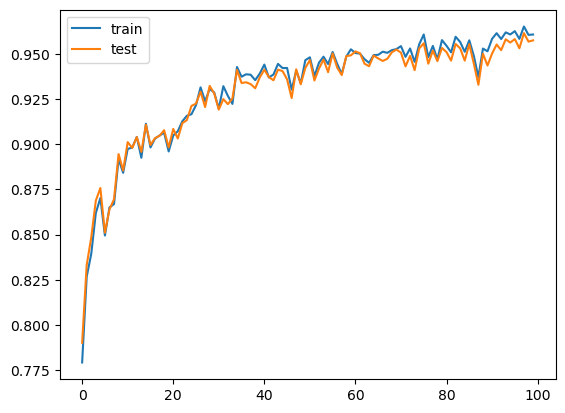

In [6]:
del model
model = create_kan()
model.load_state_dict(torch.load("kan_mnist_t.pth"))

acc = test_acc()
print(f"Test accuracy: {acc.item() * 100:.2f}%")
total_params = sum(p.numel() for p in model.parameters())
print(f"total number of parameters: {total_params}")

plt.plot(results["train_acc"], label="train")
plt.plot(results["test_acc"], label="test")
plt.legend()